In [1]:
# from google.colab import files, drive

In [2]:
# up = files.upload()

In [3]:
# drive.mount('/content/drive')

## import dataset

In [5]:
import pandas as pd
data = pd.read_csv('df.csv')
data.head(3)

,f1,f2,f3,f4,T
0,16.5,202.0,865.500000,1880.0,50.000000
1,18.0,204.0,688.000000,1738.5,44.000000
2,18.0,203.0,583.666667,1470.0,66.666667


## cleaning

In [7]:
# clean the data

## encoding

In [9]:
# encode the data

## define x, y

In [11]:
import numpy as np
x = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values

In [12]:
x[:3]

array([[  16.5      ,  202.       ,  865.5      , 1880.       ],
       [  18.       ,  204.       ,  688.       , 1738.5      ],
       [  18.       ,  203.       ,  583.6666667, 1470.       ]])

In [13]:
x.shape

(200, 4)

In [14]:
y[:3]

array([[50.        ],
       [44.        ],
       [66.66666667]])

In [15]:
y.shape

(200, 1)

## spliting

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [18]:
x_train[0].shape

(4,)

In [19]:
x_train.shape

(150, 4)

In [20]:
y_train.shape

(150, 1)

## scaling

In [67]:
# in this case its better scale both data

In [22]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler().fit(x_train)
sc_y = StandardScaler().fit(y_train)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

## fit the model

In [24]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train[0].shape),  
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)                       
])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 400)                 │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,201 (164.85 KB)

 Trainable params: 42,201 (164.85 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),             
    loss=tf.keras.losses.MeanSquaredError(),
)

In [27]:
r = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 1.0708 - val_loss: 0.6575
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.7062 - val_loss: 0.6504
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6247 - val_loss: 0.6189
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5345 - val_loss: 0.5740
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6321 - val_loss: 0.5429
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5291 - val_loss: 0.5211
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.4478 - val_loss: 0.5087
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5084 - val_loss: 0.5026
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5785 - val_loss: 0.4859
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5057 - val_loss: 0.4756


## visualizing

In [29]:
import matplotlib.pyplot as plt

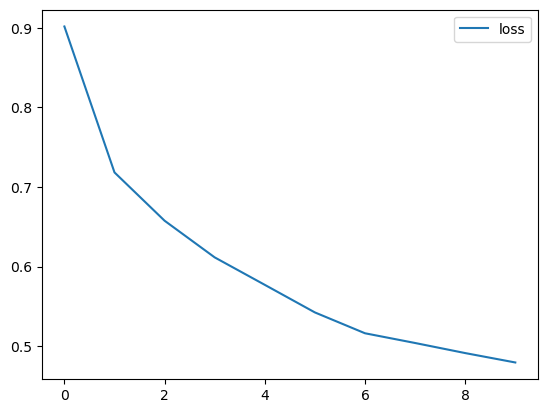

In [30]:
plt.plot(r.history['loss'], label='loss')
plt.legend()

## evaluate the model

In [32]:
from sklearn.metrics import r2_score
yhat_test = model.predict(x_test)
print(f"R2_Score: {r2_score(y_test, yhat_test)}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
R2_Score: 0.38671021143218853


## predict new data

In [34]:
new_data = sc_x.transform([[16, 200, 800, 100]])  # Use the same MinMaxScaler fitted earlier
print(model.predict(new_data))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[1.4500328]]


In [35]:
sc_y.inverse_transform(model.predict(new_data))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[77.44591]], dtype=float32)

## save the model

In [37]:
# model.save('mlp_regression.keras')

## load the model

In [39]:
# model = tf.keras.models.load_model('mlp_regression.keras')